## **Chatterbot**

*Why Natural Language Processing?*

We decided to use Natural Language Processing because we learned that natural language processing interlinks computer and human language, which allowed us to take a large set of data and analyze it to create our web scraper to visually display the data.




*What is the goal?*

Our goal for this project is to use what we have learned about Machine Learning in order to be able to deliver on the requirements for this project

*Summary of the Model*

The model starts by reading cnn_data dataset. The model then cleans the model removing stopwords and adding the remaining words into a new dataset which is matched to a dataset we came up with which consists of the most used words in teh internet during the pandemic. The model then creates a final dataset which contains the words that matched

# Testing out our model


Here, we are going to try to check how the model works by coming up with words and testing to see how much they appear in the dataframe

Uploading the neccesary libraries for the model

In [ ]:
from tokenize import tokenize

from nltk.corpus import names
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Reading csv file

In [ ]:
import pandas as pd
CNN_data = pd.read_csv("/content/cnn data.csv")

CNN_data

,url,title,body,date
0,https://www.cnn.com/2020/03/23/media/japan-abe...,Japan asked the international media to change ...,"In the new system ""Canton becomes Guangzhou an...",3/24/2020
1,https://www.cnn.com/2020/03/16/perspectives/us...,The United States is still too reliant on oil,Saudi Arabia's decision to open its taps comes...,3/24/2020
2,https://www.cnn.com/2020/03/23/investing/globa...,Global stocks and US futures rise as policymak...,The promise of unlimited support for markets f...,3/24/2020
3,https://www.cnn.com/2020/03/24/economy/china-e...,China is trying to revive its economy without ...,The country where the pandemic began was almos...,3/24/2020
4,https://www.cnn.com/2020/03/24/business/bailou...,Companies that binged on buybacks now seek bai...,"Now, some of the same companies that binged on...",3/24/2020
...,...,...,...,...
296,https://www.cnn.com/2020/03/31/business/food-s...,What happens to our food supply if American fa...,The coronavirus pandemic is posing a threat to...,4/1/2020
297,https://www.cnn.com/2019/07/31/tech/bill-nye-l...,Bill Nye's experimental spacecraft that sails ...,The prototype spacecraft is the work of the Pl...,3/24/2020
298,https://www.cnn.com/2020/03/26/perspectives/st...,These taxpayers won't get stimulus checks. Tha...,"Unfortunately, the Senate proposal does not in...",3/26/2020
299,https://www.cnn.com/2020/03/24/business/ford-3...,Ford is working with 3M and GE to make respira...,Healthcare workers around the country have exp...,3/24/2020


In [ ]:
body = CNN_data.loc[:302,'body']

body

0      In the new system "Canton becomes Guangzhou an...
1      Saudi Arabia's decision to open its taps comes...
2      The promise of unlimited support for markets f...
3      The country where the pandemic began was almos...
4      Now, some of the same companies that binged on...
                             ...                        
296    The coronavirus pandemic is posing a threat to...
297    The prototype spacecraft is the work of the Pl...
298    Unfortunately, the Senate proposal does not in...
299    Healthcare workers around the country have exp...
300    The region northwest of Denver got an 18.5% sp...
Name: body, Length: 301, dtype: object

Ramdomly selecting words to see how frequently they appear in the dataframe

In [ ]:
#setting up the keywords

tech = CNN_data['body'].str.contains('tech').value_counts()

market = CNN_data['body'].str.contains('market').value_counts()

video_games = CNN_data['body'].str.contains('video games').value_counts()

success = CNN_data['body'].str.contains('success').value_counts()

investing = CNN_data['body'].str.contains('investing').value_counts()
 
banking = CNN_data['body'].str.contains('banking').value_counts()

In [ ]:
print(tech)
print(market)
print(video_games)
print(success)
print(investing)
print(banking)

True     223
False     78
Name: body, dtype: int64
False    182
True     119
Name: body, dtype: int64
False    297
True       4
Name: body, dtype: int64
False    267
True      34
Name: body, dtype: int64
False    295
True       6
Name: body, dtype: int64
False    295
True       6
Name: body, dtype: int64


Visualization of the results

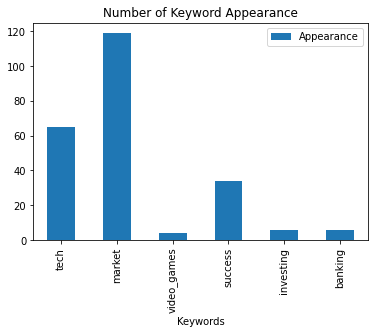

In [24]:
body = {'Keywords': ['tech','market','video_games','success','investing','banking'],
        'Appearance': [65,119,4,34,6,6]
        }

df = pd.DataFrame(body, columns = ['Keywords', 'Appearance'])

df.plot.bar(x="Keywords", y="Appearance", title="Number of Keyword Appearance")

# **The Model**

# Most used words in the dataframe

This is the begining model

In [1]:
import pandas as pd

CNN_data = pd.read_csv("/content/cnn data.csv")

CNN_data

body = CNN_data.loc[:302,'body']

body

0      In the new system "Canton becomes Guangzhou an...
1      Saudi Arabia's decision to open its taps comes...
2      The promise of unlimited support for markets f...
3      The country where the pandemic began was almos...
4      Now, some of the same companies that binged on...
                             ...                        
296    The coronavirus pandemic is posing a threat to...
297    The prototype spacecraft is the work of the Pl...
298    Unfortunately, the Senate proposal does not in...
299    Healthcare workers around the country have exp...
300    The region northwest of Denver got an 18.5% sp...
Name: body, Length: 301, dtype: object

Using CountVectorizer to remove stop words from the dataframe

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english',max_features=500)

matrix = vectorizer.fit_transform(body)
matrix

counts = pd.DataFrame(matrix.toarray(),
                      columns=vectorizer.get_feature_names())
counts

matrix.toarray()

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 2, 0, 0]])

In [3]:
print(vectorizer.get_feature_names())

['000', '10', '100', '11', '12', '15', '19', '20', '200', '2008', '2019', '2020', '24', '25', '30', '40', '50', '500', 'able', 'access', 'according', 'action', 'added', 'adding', 'additional', 'administration', 'ago', 'ahead', 'aid', 'air', 'airline', 'airlines', 'amazon', 'america', 'american', 'americans', 'analyst', 'analysts', 'announced', 'app', 'april', 'arabia', 'area', 'aren', 'asked', 'assistance', 'available', 'avoid', 'away', 'bank', 'banks', 'based', 'benefits', 'best', 'better', 'big', 'biggest', 'billion', 'business', 'businesses', 'buy', 'buying', 'california', 'called', 'calls', 'came', 'capacity', 'capital', 'care', 'case', 'cases', 'cash', 'center', 'centers', 'ceo', 'certain', 'chain', 'chains', 'change', 'changes', 'chief', 'children', 'china', 'city', 'claims', 'clear', 'close', 'closed', 'cnn', 'come', 'comes', 'coming', 'community', 'companies', 'company', 'compared', 'concerns', 'congress', 'consumer', 'consumers', 'continue', 'control', 'coronavirus', 'corporat

Cleaning up the data

In [4]:
counts = pd.DataFrame(matrix.toarray(),
                      columns=vectorizer.get_feature_names())
counts

,000,10,100,11,12,15,19,20,200,2008,2019,2020,24,25,30,40,50,500,able,access,according,action,added,adding,additional,administration,ago,ahead,aid,air,airline,airlines,amazon,america,american,americans,analyst,analysts,announced,app,...,trillion,trump,try,trying,tuesday,uk,unemployment,union,united,university,unprecedented,use,used,users,using,ve,ventilators,video,virtual,virus,walmart,want,war,way,ways,wednesday,week,weeks,white,women,won,work,workers,working,world,wrote,year,years,york,zoom
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,...,0,0,0,2,0,1,0,0,1,1,0,1,3,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,4,1,0,0,0,3,0,...,0,2,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,...,2,0,0,0,4,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,1,0
3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,5,0,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2,1,0,...,0,1,0,1,1,0,0,0,1,4,0,0,0,0,2,0,0,0,0,10,0,0,0,1,0,0,3,1,0,0,0,11,7,1,5,1,2,0,0,0
4,0,4,0,2,0,0,0,0,0,0,4,1,0,0,0,0,2,2,0,0,3,0,0,0,0,0,0,0,0,0,4,8,0,3,2,0,2,0,2,0,...,0,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,2,0,0,4,0,0,0,2,0,3,0,1,0,4,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,5,0,0,0,0,0,1,0,3,0,0,0,1,0,0,0,0,0,7,1,1,0,4,0,0,0,0,2,0,0,0,1,0,1,1,6,0,0,0,0,...,0,0,0,0,0,0,1,0,8,1,1,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,1,1,0,0,3,9,13,0,1,0,7,0,1,0
297,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,1,0,0,0,2,0,0
298,0,1,0,0,1,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,3,1,2,0,0,0,0,0
299,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,5,0,0,0,0,0,0,0,0,4,0,...,0,0,1,0,0,0,0,1,1,0,0,0,2,0,2,1,10,0,0,1,0,0,0,0,0,0,2,0,0,0,0,4,4,2,0,0,0,0,0,0


In [5]:
counts.T.sort_values(by=0, ascending=False).head(10)                                          

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300
change,8,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,1,0,1,0,1,1,0,0,0,0,13,0,0,0,0,0,0,0,0,0,1
media,8,0,0,3,0,0,0,0,0,0,0,3,0,2,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0,1,0,0,0,0,0
said,7,0,3,9,5,8,16,8,6,0,6,11,9,0,5,5,5,0,0,8,9,1,8,0,9,11,6,3,0,7,6,8,3,1,11,6,6,8,4,6,...,13,3,18,9,5,2,12,3,8,8,13,2,15,11,11,7,1,16,1,4,11,21,3,7,6,6,3,3,3,27,8,6,6,6,4,18,5,1,10,12
japan,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
request,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
family,6,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,1,0,0,1,1,0,0,3,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
government,6,2,2,10,2,0,0,0,0,2,0,1,0,0,0,0,1,6,0,1,1,0,1,3,1,0,0,0,0,2,0,2,0,0,6,0,0,1,0,0,...,1,1,0,0,1,0,0,0,1,9,0,1,1,0,3,2,0,1,0,3,0,1,2,8,0,0,3,1,0,0,0,0,0,1,0,4,0,0,0,0
new,5,1,2,2,0,1,10,1,0,9,1,1,3,0,0,1,1,0,0,1,4,0,1,0,0,3,0,0,1,1,2,2,3,1,0,0,2,0,0,2,...,7,2,4,2,5,1,11,4,1,1,0,4,2,3,0,2,0,2,0,0,5,3,4,0,1,2,1,3,0,10,3,2,0,1,1,3,0,0,1,0
time,4,0,0,0,0,2,11,0,3,2,0,1,0,0,5,3,0,0,1,1,10,1,0,3,3,0,1,0,2,3,0,3,2,5,0,4,2,0,0,1,...,2,0,4,3,1,0,5,2,1,2,1,1,1,2,4,0,0,4,3,3,4,1,0,0,0,0,1,0,1,7,3,1,1,0,0,6,1,1,0,2
cnn,4,0,2,1,1,1,0,0,2,0,1,1,4,0,4,0,1,0,3,2,0,1,1,0,0,0,0,0,0,0,1,0,2,0,0,2,1,3,1,0,...,1,0,0,9,1,0,0,0,2,0,0,1,0,0,0,0,3,0,0,1,0,2,0,0,1,0,0,0,0,1,5,0,3,1,1,2,0,0,1,0


In this line we create a new dataframe and sort the values based on their frequency

In [6]:
total = counts.sum()

sorted_total_words = total.sort_values(ascending=False)

df = sorted_total_words.to_frame()
df = df.reset_index()
df = df.rename(columns = {'index':'Words'})



The Dataframe with columns: Words and Frequency

In [7]:
df.columns=['Words', 'Freq']
df

,Words,Freq
0,said,1922
1,people,717
2,company,599
3,coronavirus,573
4,business,546
...,...,...
495,goldman,45
496,effort,45
497,seeing,45
498,sector,45


Removing any words with frequency above 1000

In [8]:
Selected = df[(df["Freq"]<1000)]
df = Selected.head(10)
df

,Words,Freq
1,people,717
2,company,599
3,coronavirus,573
4,business,546
5,workers,498
6,new,482
7,time,457
8,work,403
9,companies,378
10,employees,374


Visualizing the dataset

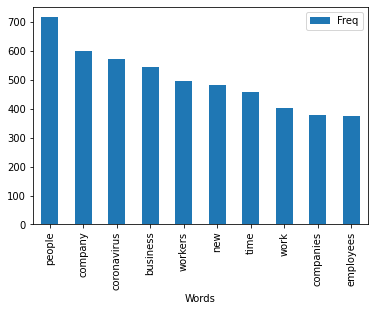

In [9]:
import matplotlib.pyplot as plt
import numpy as np

df.plot(x ='Words', y='Freq', kind = 'bar')

Reading Pandemic.txt which is a dataset our group came up with that consists of the most common words in the internet during the pandemic

In [10]:
#uploading the txt file

the_text_data = pd.read_csv('/content/Pandemic.txt')

the_text_data


,Terms
0,Antibodies
1,Community Spread
2,Containment
3,COVID-19
4,Epidemic
...,...
77,essential business
78,flattening the curve
79,PPE
80,zooming


Matching the words from the new dataset based from cnn_data, and the Pandemic.txt dataset 

In [ ]:
cv = CountVectorizer(stop_words="english", max_features=600)
bag_of_words = cv.fit_transform(the_text_data["Terms"])

#print(bag_of_words)

sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items() ]#if word in the_text_data["Terms"]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
for word, count in words_freq:
    print(word + ":", count)


In [16]:
words_freq

[('covid', 3),
 ('curve', 3),
 ('social', 3),
 ('quarantine', 3),
 ('community', 2),
 ('spread', 2),
 ('19', 2),
 ('fatality', 2),
 ('flattening', 2),
 ('isolation', 2),
 ('distancing', 2),
 ('ventilator', 2),
 ('trump', 2),
 ('essential', 2),
 ('antibodies', 1),
 ('containment', 1),
 ('epidemic', 1),
 ('herd', 1),
 ('immunity', 1),
 ('immunicompromised', 1),
 ('incubation', 1),
 ('mortality', 1),
 ('morbidity', 1),
 ('pandemic', 1),
 ('physical', 1),
 ('respirator', 1),
 ('self', 1),
 ('coronavirus', 1),
 ('corona', 1),
 ('face', 1),
 ('mask', 1),
 ('progress', 1),
 ('truth', 1),
 ('trade', 1),
 ('war', 1),
 ('sustainability', 1),
 ('flatten', 1),
 ('lockdown', 1),
 ('identity', 1),
 ('politics', 1),
 ('progressives', 1),
 ('zoom', 1),
 ('meeting', 1),
 ('migrants', 1),
 ('donald', 1),
 ('symptoms', 1),
 ('outbreak', 1),
 ('cdc', 1),
 ('conservatives', 1),
 ('unemployment', 1),
 ('climate', 1),
 ('change', 1),
 ('hand', 1),
 ('sanitiser', 1),
 ('white', 1),
 ('privilege', 1),
 ('work'

Matched words are added to the final dataset

In [13]:
df = pd.DataFrame(words_freq) 
df = df.reset_index()
df = df.rename(columns = {'index':'Words'})
df.columns=['Index', 'Words','Match']
df = df.head(20)
df

,Index,Words,Match
0,0,covid,3
1,1,curve,3
2,2,social,3
3,3,quarantine,3
4,4,community,2
5,5,spread,2
6,6,19,2
7,7,fatality,2
8,8,flattening,2
9,9,isolation,2


Visualization of the final dataset

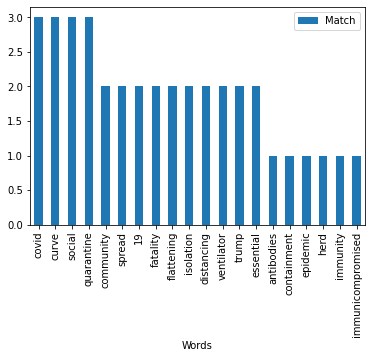

In [14]:
df.plot(x ='Words', y='Match', kind = 'bar')

Using the word "coronavirus" to determine how much articles are related to coronavirus in the entire cnn dataframe

True     223
False     78
Name: body, dtype: int64


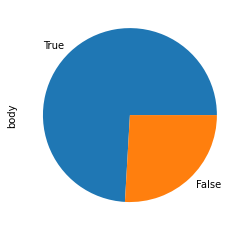

In [26]:
coronavirus = CNN_data['body'].str.contains('coronavirus').value_counts()

print(coronavirus)
coronavirus.plot(kind = 'pie')


More than 75% of the articles in the cnn_data are related to coronavirus